# CH09_2_Generating Recurrent Network and Classifying Text

- Last update : 2022.04.14. 

## # Prepare training set and verifying set

In [96]:
# 1. Loading the IMDB data set from tensorflow 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

In [25]:
# 2. Cheking out training set size
print (x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [27]:
# 3. Checking out Training set sample

print (x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [29]:
# 4. Eliminating 2 from training set 

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
print (x_train_all[0])    

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [30]:
# 5. downloading terminology dictionary

word_to_index = imdb.get_word_index()
word_to_index['movie']

1646592/1641221 [==============================] - 0s 0us/step


17

In [31]:
# 6. Transforming integer in training set into English words string

index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]: 
    print(index_to_word[w - 3], end=' ')
    

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [32]:
# 7. Checking out the length of the training sample

print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [33]:
print(x_train_all)

[list([22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32])
 list([78, 26, 20, 21, 69, 30, 23, 93, 35, 89, 29, 46, 37, 45, 43, 38, 26, 68, 98, 43, 50, 32, 78, 22, 64, 23, 28, 52, 33, 89, 78, 95])
 list([47, 30, 31, 54, 61, 71, 22, 33, 75, 43, 86, 35, 33, 89, 78, 66, 58, 43, 85, 42, 83, 68, 36, 36, 69, 22, 28, 40, 87, 23, 21, 23, 22, 40, 57, 31, 22, 47, 51, 23, 79, 89, 35])
 ...
 list([45, 84, 21, 84, 84, 36, 28, 57, 21, 84, 56, 31, 20, 97, 20, 53, 74, 29, 45, 40, 29, 89, 70, 29, 64, 26, 27, 47, 84, 37, 61, 34, 65, 59])
 list([69, 72, 23, 54, 45, 58, 43, 23, 62, 30, 51, 32, 61, 71, 66, 75, 37, 69, 75, 44, 69, 50, 23, 40, 40, 25, 70, 31, 62, 40, 25, 52, 58, 92, 39, 38, 84, 80, 23])
 list([22, 45, 39, 50, 47, 38, 24, 78, 21, 27, 92, 42, 97, 90, 35, 29, 27, 97, 21, 66, 78, 21, 60, 27, 43, 40, 20, 72, 51, 22])

In [34]:
# 8. Checking out target data of training set 

print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [47]:
# 9. preparing verifying dataset

np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

print (">>> x_train "+str(x_train.shape)+"=\n", x_train)
print ("\n>>> y_train"+str(y_train.shape)+" =", y_train)
print ('-------------------------------')
print ("\n>>> x_val "+str(x_val.shape)+"=\n", x_val)
print ("\n>>> y_val "+str(y_val.shape)+"=", y_val)

>>> x_train (20000,)=
 [list([35, 40, 27, 28, 40, 22, 83, 31, 85, 45, 24, 23, 31, 70, 31, 76, 30, 98, 32, 22, 28, 51, 75, 56, 30, 33, 97, 53, 38, 46, 53, 74, 31, 35, 23, 34, 22, 58])
 list([54, 39, 27, 35, 35, 56, 27, 29, 80, 27, 27, 46, 23, 35, 64, 86, 65, 35, 22, 63, 73, 29, 22, 82, 34, 50, 26, 21, 47, 30, 97, 83, 76, 69, 86, 31, 61, 49, 99, 85, 85, 26, 73, 81, 87, 53, 26, 53, 74, 26, 53, 62, 28, 21, 50, 44, 93, 22, 39, 34, 21, 45, 87, 20, 32])
 list([26, 42, 99, 30, 78, 35, 96, 45, 48, 88, 41, 24, 59, 43, 23, 61, 20, 30, 42, 33, 32])
 ...
 list([39, 76, 56, 34, 94, 64, 39, 67, 82, 66, 94, 30, 23, 38, 50, 26, 54, 25, 70, 67, 34, 57, 23, 50, 26, 26, 26, 56, 48, 25, 79, 32, 97, 78, 20, 94, 55, 67, 49, 26, 21, 64, 25, 26, 31, 91, 94, 22, 47, 49, 94, 24, 67, 21, 94, 66, 48, 25, 81, 81, 38, 24])
 list([20, 67, 62, 30, 35, 54, 25, 79, 20, 69, 55, 20, 63, 71, 23, 70, 33, 32, 67, 20, 80, 24])
 list([22, 66, 76, 45, 55, 63, 63, 62, 60, 49, 45, 56, 54, 36, 71, 71, 23, 42, 21, 51, 50, 26, 52, 3

## # Alligning the length of sample 

In [54]:
# 1. Aligning the length of sample using tensorflow

from tensorflow.keras.preprocessing import sequence 

maxlen = 100 
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [61]:
# 2. Checking out the size of alligned training set and sample 

print (">>> x_train_seq.shape, x_val_seq.shape =", x_train_seq.shape, x_val_seq.shape)

print ('\n>>> x_train_seq[0] =\n', x_train_seq[0])

>>> x_train_seq.shape, x_val_seq.shape = (20000, 100) (5000, 100)

>>> x_train_seq[0] =
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


## # One-hot Incoding of the samples 

In [89]:
# 1. One-hot incoding using tensorflow and cheking out the size of variables 

from tensorflow.keras.utils import to_categorical 

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

# 1.1. size checking 
print (">>> x_train_onehot.shape =", x_train_onehot.shape)

# 1.2. memory checking 
print (">>> x_train_onehot.nbytes = {0:10d} Byte".format(x_train_onehot.nbytes))
print (">>> x_train_onehot.nbytes = {0:10.3f} MB".format(x_train_onehot.nbytes/1024 /1024))

>>> x_train_onehot.shape = (20000, 100, 100)
>>> x_train_onehot.nbytes =  800000000 Byte
>>> x_train_onehot.nbytes =    762.939 MB


## # Making Recurrent network class 

In [90]:
# 1. Modifying __init__() method

def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
    self.n_cells = n_cells            # no. of cells
    self.batch_size = batch_size      # batch size 
    self.w1h = None                   # weight of hidden status 
    self.w1x = None                   # weight of input 
    self.b1 = None                    # interscept of recurrent layer 
    self.w2 = None                    # weight of output layer
    self.b2 = None                    # interscept of output layer
    self.h = None                     # activation output of recurrent layer 
    self.losses = []                  # training loss 
    self.val_losses = []              # verification loss
    self.lf = learning_rate           # learning rate 

In [91]:
# 2. Initializing weight using orthogonal initialization 

def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal()
    glorot_init = tf.initializers.GlorotUniform()
    
    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()  # (no. of cells, no. of cells)
    self.w1x = glorot_init((n_features, self.n_cells)).numpy()  # (no. of features, no. of cells)
    self.b1 = np.zeros(self.n_cells)                            # size of hidden layer 
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()    # (no. of cells, no. of classes)
    self.b2 = np.zeros(n_classes)

In [ ]:
# 3. Constructing Forward Propagation calculation 

def forpass(self, x): 
    self.h = [np.zeros((x.shape[0], self.n_cells))]    # initializing hidden status 
    ...

In [16]:
# 4. Changing the batch dimension and time steps
    ...
    # Exchange the batch dimension with step dimension 
    seq = np.swapaxes(x, 0, 1)
    ...

In [ ]:
# 5. forward propagation calculation in every time steps of each sample
    ...
    # calculating recurrent layer linear regression 
    for x in seq: 
        z1 = np.dot(x, self.w1x)+np.dot(self.h[-1], self.w1h) + self.b1
        h = np.tanh(z1)                           # applying activation function 
        self.h.append(h)                          # saving hidden status for backpropagation 
        z2 = np.dot(h, self.w2) + self.b2         # calculating linear regression of output layer
    return z2 

In [93]:
# 6. Implementing backward propagation calculation 

def backpro(self, x, err): 
    m = len(x)              # no. of samples 
    
    # calculating gradient of weight and interscept of output layer 
    w2_grad = np.dot(self.h[-1].T, err) / m
    b2_grad = np.sum(err) / m 
    
    # exchange batch dimension with time step dimension 
    seq = np.swapaxes(x, 0, 1)
    
    w1h_grad = w1x_grad = b1_grad = 0 
    
    # calculating gradient right before cell 
    err_to_cell = np.dot(err, self.w2.T) * (1-self.h[-1]**2)
    
    # transfer gradient by backpropagating every time step
    for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
        w1h_grad += np.dot(h.T, err_to_cell)
        w1x_grad += np.dot(x.T, err_to_cell)
        b1_grad += np.sum(err_to_cell, axis=0)
        
        err_to_cell = np.dot(err_to_cell, self.w1h) * (1-h**2)
        
    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m
     
    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

In [123]:
# 7. Modifying other methods

class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells            # no. of cells
        self.batch_size = batch_size      # batch size 
        self.w1h = None                   # weight of hidden status 
        self.w1x = None                   # weight of input 
        self.b1 = None                    # interscept of recurrent layer 
        self.w2 = None                    # weight of output layer
        self.b2 = None                    # interscept of output layer
        self.h = None                     # activation output of recurrent layer 
        self.losses = []                  # training loss 
        self.val_losses = []              # verification loss
        self.lr = learning_rate           # learning rate 
        
    def forpass(self, x): 
        self.h = [np.zeros((x.shape[0], self.n_cells))]    # initializing hidden status 
        # Exchange the batch dimension with step dimension 
        seq = np.swapaxes(x, 0, 1)
        # calculating recurrent layer linear regression 
        for x in seq: 
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                           # applying activation function 
            self.h.append(h)                          # saving hidden status for backpropagation 
            z2 = np.dot(h, self.w2) + self.b2         # calculating linear regression of output layer
        return z2 
    
    def backprop(self, x, err): 
        m = len(x)              # no. of samples 

        # calculating gradient of weight and interscept of output layer 
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m 
        # exchange batch dimension with time step dimension 
        seq = np.swapaxes(x, 0, 1)

        w1h_grad = w1x_grad = b1_grad = 0 
        # calculating gradient right before cell 
        err_to_cell = np.dot(err, self.w2.T) * (1-self.h[-1]**2)
        # transfer gradient by backpropagating every time step
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # calculating gradient right before the cell in previous time step
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1-h**2)

        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m

        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z): 
        a = 1/ (1+np.exp(-z))                 # calculating sigmoid 
        return a 
    
    def init_weights(self, n_features, n_classes): 
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (no. of cells, no. of cells)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (no. of features, no. of cells)
        self.b1 = np.zeros(self.n_cells)                           # size of hidden layer  
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()  # (no. of cells, no. of classes)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # initializing weight of hidden layer and output layer 
        # repeate the routine epoch times 
        for i in range(epochs): 
            print ("EPOCH", i , end=' ')
            # circulating mini-batch returned from generator function 
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y): 
                print ('.', end ='')
                a = self.training(x_batch, y_batch)    
                
                # clipping for safe logarian calculation 
                a = np.clip(a, 1e-10, 1-1e-10)
                # accumulating logarian loss and regularization loss to the loss and adding it to the list
                loss = np.mean(-(y_batch*np.log(a)+(1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print ( )
            self.losses.append(np.mean(batch_losses))
            # calculating the loss of verification set 
            self.update_val_loss(x_val, y_val)
    
    # mini-batch generator function 
    def gen_batch(self, x, y): 
        length = len(x)
        bins = length // self.batch_size      # mini batch frequency 
        if length % self.batch_size: 
            bins +=1                          # if it has remainder        
        indexes = np.random.permutation(np.arange(len(x)))   # shuffle indexes 
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i 
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]      # returning the value slicing in batch_size                                
        
    
    def training(self, x, y):
        m = len(x)                            # saving the no. of samples
        z = self.forpass(x)                   # carring on forward propagation calculation 
        a = self.sigmoid(z)                   # applying activation function 
        err = -(y - a)                        # calculating errors 
        # Calculating gradient by backpropagating errors
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # updating weight and interscept of cell 
        self.w1h -= self.lr * w1h_grad 
        self.w1x -= self.lr * w1x_grad 
        self.b1 -= self.lr * b1_grad
        # updating weight and interscept of output layers 
        self.w2 -= self.lr *  w2_grad 
        self.b2 -= self.lr * b2_grad
        return a 
        
    def predict(self, x):
        z = self.forpass(x)            # carry opn forward propagation calculation 
        return z > 0                   # applying step function 
    
    def score(self, x, y):
        # returning True ratio by comparing prediction with target column vector
        return np.mean(self.predict(x) == y.reshape(-1, 1))    
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)           # carry opn forward propagation calculation 
        a = self.sigmoid(z)               # applying activation function 
        a = np.clip(a, 1e-10, 1-1e-10)    # clipping the output value 
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)    

## # Model Training of Recurrent Network 

In [127]:
# 1. Model Training of Recurrent Network 

rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

EPOCH 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
EPOCH 1 ......................................................................................................................................................................................................................................................................................................................................................................

EPOCH 12 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
EPOCH 13 ....................................................................................................................................................................................................................................................................................................................................................................

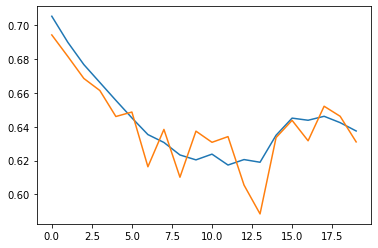

In [128]:
# 2. Plotting the Loss graph on the training and verifying set

import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [129]:
# 3. Evaluating accuracy of verification set 

rn.score(x_val_onehot, y_val)

0.64